In [24]:
#general deps
import matplotlib.pyplot as plt
import librosa
import librosa.display

https://www.youtube.com/watch?v=Z7YM-HAz-IY&list=PLhA3b2k8R3t2Ng1WW_7MiXeh1pfQJQi_P - DSP Background 

Notes Start

NOTE: THIS INFORMATION IS ABOUT DIFFERENCIATING INSTRUMENTS.

BIT DEPTH
Bit depth of 16 = 2^16 discrete values per sample

Fourier Transform / Fast Fourier Transform
Good way to express data in a different format
Audio -> FFT results in a Periodogram

Periodogram - the real value of the Fourier Transform. I think it is restricted to a single sample (no time data)
Y Axis represents magnitude
X Axis represents Frequency

Audio is typically recorded at 44.1khz
Will give us our Nyquist(?) frequency - exactly half of the sampling frequency = 22khz
Nyquist frequency = highest freq we can represent from our environment - at 44.1khz recording rate, we cannot record a 30khz sound.

Downsampling
Downsampling audio will result in a lower Nyquist frequency.

Spectrogram
A spectrogram is taking a periodogram, and stacking them adjacent to eachother over time.
the spectrogram is represented in 3 dimensions.
Y AXIS - FREQUENCY
X AXIS - TIME
Z AXIS - MAGNITUDE (represented via pixel intensity)

Short-Time Fourier Transform
--settings in video--
Sampling Rate - 16khz
Window Length = 25ms = 400 samples
Step Size = 10ms = 160 samples
N FFT = 512 samples
note: for a more accurate representation when considering genre, it may be necessary NOT to downsample to 16khz, as we lose content above 8khz. Might be good to downsample for one layer of computation (instrument classification) and then use the full quality file for a more detailed result.

Mel Scale / Mel Filterbank
As humans, it is easy for us to distinguish the differences between say 10hz and 50hz. Similarly, we could not obviously distinguish a frequency difference of 21khz and 22khz, which is magnitudes larger than the 40hz difference.
The Mel Scale is just the logarithmic way of representing the linear domain of frequencies. We do not care about small differences in high frequency values, but we would for low.

The Mel Scale is an alternative to the Hz Scale, where every unit on the Mel Scale "Sounds" equidistant from one another. 

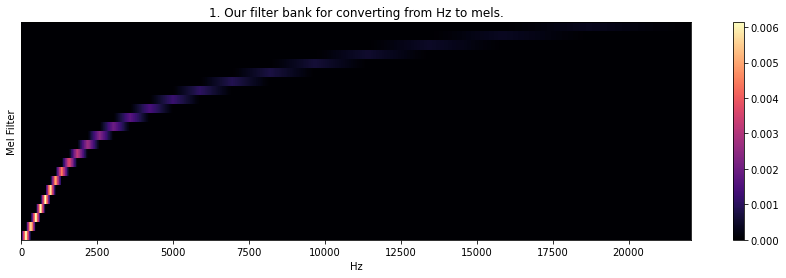

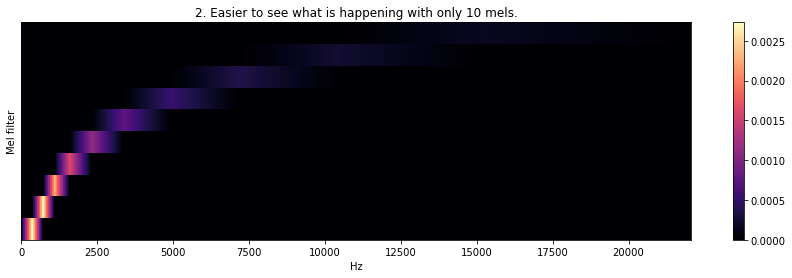

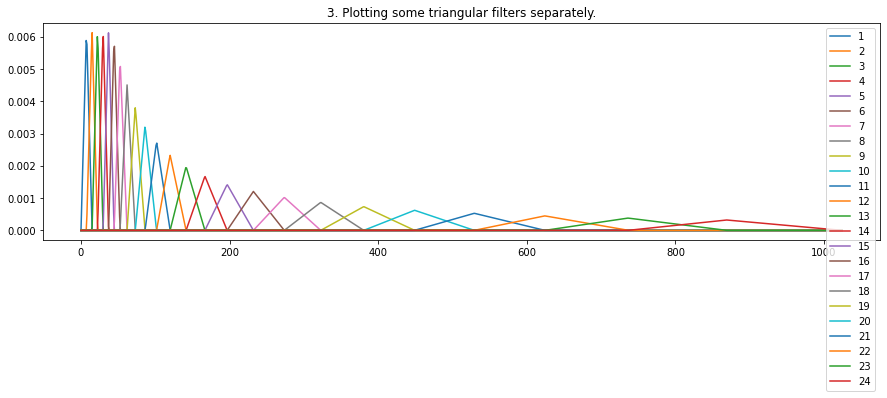

In [35]:
import math
# class mels:
#     def filterbank(frequency):
#         return 1125*math.log()*(1 + (frequency/700))
#     def filterbankInverse(m):
#         700*(math.exp(m/1125) - 1)

#Example Filterbank ----------/
NUM_MELS = 26
SAMPLE_RATE = 44100
NUM_FFT = 2048
HOP_LENGTH = NUM_FFT + 1

mel = librosa.filters.mel(sr=SAMPLE_RATE,n_fft=NUM_FFT, n_mels=24)

#Figure setup
plt.figure(figsize=(15,4))
librosa.display.specshow(mel, sr=SAMPLE_RATE, hop_length = HOP_LENGTH, x_axis='linear')
plt.ylabel('Mel Filter')
plt.colorbar()
plt.title('1. Our filter bank for converting from Hz to mels.')
plt.show()

plt.figure(figsize=(15,4))
mel_10 = librosa.filters.mel(sr=SAMPLE_RATE, n_fft=NUM_FFT, n_mels=10)
librosa.display.specshow(mel_10, sr=SAMPLE_RATE, hop_length = HOP_LENGTH, x_axis='linear')
plt.ylabel('Mel filter')
plt.colorbar()
plt.title('2. Easier to see what is happening with only 10 mels.')
plt.show()

plt.figure(figsize=(15,4))
for i in range(0, len(mel)):
    plt.plot(melf[i])
plt.legend(labels=[f'{i+1}' for i in range(0,len(mel))])
plt.title('3. Plotting some triangular filters separately.')
plt.show()

Feature Engineering
(26x99) - 26* filterbanks, 99 samples (1 second) - Filter Bank Coefficients
These energies end up highly correlated - we have to discrete cosine transform - used alot in audio compression and image compression - think of it as a lowpass filter for your different energies that youve already calculated. The idea is to remove high frequency content, compact the information down to lower frequencies. This creates our final feature: MCC

Mel Cepstrum Coefficient (MCC) (13x99) We only want to keep the lower 13 frequencies.


RESOURCES FOR READING:

http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/

https://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html

https://datagenetics.com/blog/november32012/index.html